<a href="https://colab.research.google.com/github/rayhan1999/ML-Project/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path_train = '/content/drive/My Drive/ML Project Dataset/SentimentAnalysis/SentimentTrain.csv'
file_path_test = '/content/drive/My Drive/ML Project Dataset/SentimentAnalysis/SentimentTest.csv'
df_train = pd.read_csv(file_path_train, encoding='latin1')
df_test = pd.read_csv(file_path_test, encoding='latin1')

In [6]:
df_train.head(5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [7]:
df_test.head(5)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [8]:
df_train.shape

(27481, 10)

In [9]:
df_test.shape

(4815, 9)

In [10]:
df_train.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [11]:
df_test.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [14]:
df_train.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [15]:
df_test.isnull().sum()

,0
textID,1281
text,1281
sentiment,1281
Time of Tweet,1281
Age of User,1281
Country,1281
Population -2020,1281
Land Area (Km²),1281
Density (P/Km²),1281


In [16]:
df_train.nunique()

,0
textID,27481
text,27480
selected_text,22430
sentiment,3
Time of Tweet,3
Age of User,6
Country,195
Population -2020,195
Land Area (Km²),193
Density (P/Km²),136


In [17]:
df_test.nunique()

,0
textID,3534
text,3534
sentiment,3
Time of Tweet,3
Age of User,6
Country,195
Population -2020,195
Land Area (Km²),193
Density (P/Km²),136


**Potential Objectives:**

Based on the dataset's features, here are some potential objectives for analysis and modeling:

**Sentiment Analysis and Prediction:**

**Objective:** Build a model to predict the sentiment (positive, negative, neutral) of tweets based on their text content.

**Reasoning:** The dataset includes text and sentiment labels, which are essential for training a sentiment analysis model. This could be valuable for understanding public opinion or customer feedback.

**Sentiment Analysis by Demographics:**

**Objective:** Investigate how sentiment varies across different age groups, countries, or population densities.

**Reasoning:** The dataset contains demographic information like Age of User and Country. This objective could reveal interesting patterns and insights about sentiment in different populations.

**Time-Based Sentiment Analysis:**

**Objective:** Analyze how sentiment changes over time (e.g., daily, weekly, monthly).

**Reasoning:** The 'Time of Tweet' column allows for exploring temporal trends in sentiment. This could be useful for identifying emerging trends or patterns in public opinion.

**Impact of Demographics on Sentiment:**

**Objective:** Determine if factors like population density or country influence the sentiment expressed in tweets.

**Reasoning:** The dataset includes demographic data, which could be used to identify correlations or relationships with sentiment.

**Text Classification:**

**Objective:** Classify tweets into different categories based on their text content.

**Reasoning:** This could be a more granular sentiment analysis, classifying tweets into specific emotions or topics.

**Data Visualization and Exploration:**

**Objective:** Create visualizations to explore relationships between different variables in the dataset, such as sentiment and country.

**Reasoning:** Visualizations can provide valuable insights into the data and help in understanding patterns and trends.

**Recommendations:**

**Prioritize Data Cleaning:** Before diving into analysis, address the missing values in the dataset. This could involve removing rows with missing data or imputing missing values.

**Start with Sentiment Analysis:** This is a core objective given the dataset's structure. Focus on building a sentiment prediction model first.

**Explore Demographic Relationships:** Once the sentiment model is established, explore the relationships between sentiment and demographic features.

**Consider Visualization:** Data visualization can help communicate insights and patterns discovered in the analysis.

In [18]:
#Imports for text cleaning
import string
import re
import nltk

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
# Imports for preprocessing, modeling and evaluation
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.tree import plot_tree

from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from xgboost import XGBClassifier
from xgboost import plot_importance

import time

In [20]:
# Imports for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#Remove rows with missing data in both datasets
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [22]:
#Check for duplicates in the training dataset
df_train.duplicated().sum()

0

In [23]:
#Rename columns as needed
df_train.columns= df_train.columns.str.lower()
df_train=df_train.rename(columns={'textid':'text_id','time of tweet':'time_of_tweet','age of user':'age_of_user','population -2020':'population_2020','land area (km²)':'land_area_km2','density (p/km²)':'density_p_km2'})
df_test.columns= df_test.columns.str.lower()
df_test=df_test.rename(columns={'textid':'text_id','time of tweet':'time_of_tweet','age of user':'age_of_user','population -2020':'population_2020','land area (km²)':'land_area_km2','density (p/km²)':'density_p_km2'})

In [24]:
df_train.head(5)

,text_id,text,selected_text,sentiment,time_of_tweet,age_of_user,country,population_2020,land_area_km2,density_p_km2
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [25]:
# Check if the distribution of sentiment labels in the dataset is imbalanced.
df_train['sentiment'].value_counts()

,count
sentiment,
neutral,11117
positive,8582
negative,7781


Text(0, 0.5, 'Frequency of sentiment')

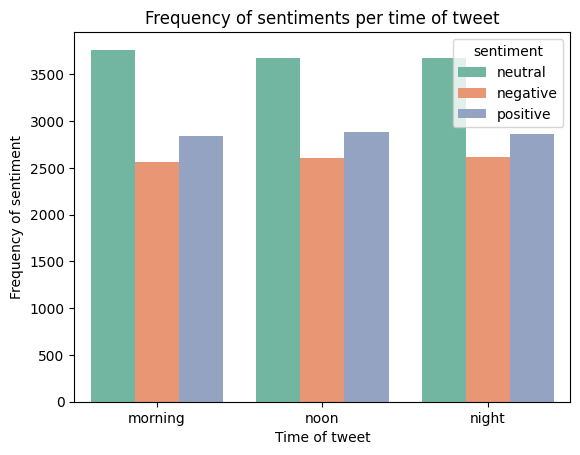

In [26]:
# Visualizing tweet time distribution with a histogram to determine its influence on sentiment
sns.countplot(data=df_train,x='time_of_tweet',hue='sentiment', palette='Set2')
plt.title("Frequency of sentiments per time of tweet")
plt.xlabel("Time of tweet")
plt.ylabel("Frequency of sentiment")

Text(0, 0.5, 'Frequency of sentiment')

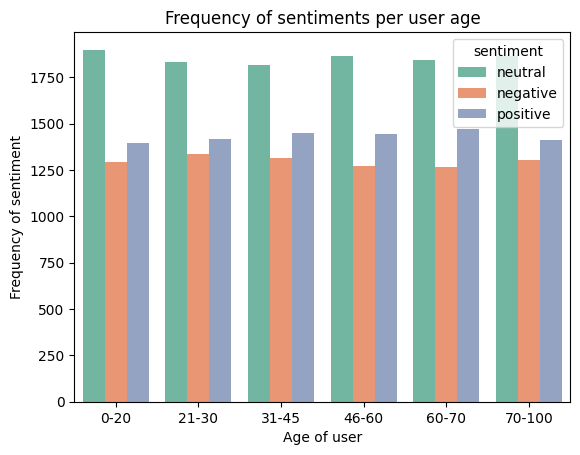

In [27]:
# Visualizing age-of-user distribution with a histogram to determine its influence on sentiment
sns.countplot(data=df_train,x='age_of_user',hue='sentiment', palette='Set2')
plt.title("Frequency of sentiments per user age")
plt.xlabel("Age of user")
plt.ylabel("Frequency of sentiment")

In [28]:
# Keep only the 'text' and 'sentiment' columns for further analysis.
df1_train=df_train[['text','sentiment']].copy()

In [29]:
# Perform cleaning and preprocessing on the 'text' column
def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = re.sub(f'[{string.punctuation}]', '', text)
    # Remove newlines
    text = re.sub(r'\n', '', text)
    # Remove alphanumeric words (words containing digits)
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove remaining non-alphabetic characters (except spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    # Normalize repeated characters (e.g., "soooo" -> "so")
    text = re.sub(r'(.)\1+', r'\1\1', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Stem words using LancasterStemmer
    stemmer = LancasterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join words back into a single string
    text = ' '.join(words)

    return text

# Ensure the 'text' column is of string type
df1_train['text'] = df1_train['text'].astype(str)
df_test['text'] = df_test['text'].astype(str)

# Apply the clean_text function and assign it back to the DataFrame
df1_train['text'] = df1_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [30]:
# Display the first 10 rows of the training dataset.
df1_train.head(10)

,text,sentiment
0,id respond going,neutral
1,soo sad miss san diego,negative
2,boss bul,negative
3,interview leav alon,negative
4,son couldnt put releas already bought,negative
5,shameless plug best rang for ear,neutral
6,fee baby fun smil coo,positive
7,soo high,neutral
8,,neutral
9,journey wow u becam cool heh poss,positive


In [31]:
# Display the first 10 rows of the testing dataset.
df_test.head(10)

,text_id,text,sentiment,time_of_tweet,age_of_user,country,population_2020,land_area_km2,density_p_km2
0,f87dea47db,last sess day,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,shangha also real excit prec skyscrap gal good...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,recess hit veron branquinho quit company sham,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,lik,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
5,726e501993,that gre wee visit,positive,night,70-100,Antigua and Barbuda,97929.0,440.0,223.0
6,261932614e,think everyon hat lol,negative,morning,0-20,Argentina,45195774.0,2736690.0,17.0
7,afa11da83f,soo wish could im school myspac complet block,negative,noon,21-30,Armenia,2963243.0,28470.0,104.0
8,e64208b4ef,within short tim last clu,neutral,night,31-45,Australia,25499884.0,7682300.0,3.0
9,37bcad24ca,get day alright hav don anyth yet leav soon st...,neutral,morning,46-60,Austria,9006398.0,82400.0,109.0


In [32]:
# Select features for training and testing datasets
X_train = df1_train['text']
X_test = df_test['text']
y_train = df1_train['sentiment']
y_test = df_test['sentiment']

In [33]:
# Apply vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))
XV_train = vectorizer.fit_transform(X_train)
XV_test = vectorizer.transform(X_test)

In [33]:
# Logistic Regression model
print("Training....")
t0=time.time()
clf = LogisticRegression(max_iter = 300).fit(XV_train,y_train)
train_time = time.time()-t0
print(f"train time: {train_time:.3}s")

Training....
train time: 15.7s


In [34]:
# Predict on test set.
t0=time.time()
y_pred = clf.predict(XV_test)
predict_time = time.time()-t0
print(f"predict time: {predict_time:.3}s")

predict time: 0.0162s


In [35]:
# Sci-kit learn built-in cross validationn implementation
from sklearn.model_selection import cross_val_score
cv = cross_val_score(clf, XV_train, y_train, cv=3, scoring='accuracy' )

In [36]:
print(cv)

[0.67412664 0.67816594 0.67259825]


In [37]:
## Cross-Validation custom implementation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True)

for train_index, test_index in skfolds.split(XV_train, y_train):
    clone_clf = clone(clf)
    X_train_folds = XV_train[train_index]
    y_train_folds = y_train.iloc[train_index]  # Use .iloc to select from y_train
    X_test_fold = XV_train[test_index]
    y_test_fold = y_train.iloc[test_index]  # Use .iloc to select from y_train

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.6719432314410481
0.6721615720524018
0.6725982532751091


**So, the accuracy of the model is 67% approx**

**But accuracy isn't a good performance indicator for classification**

**So now we will try cnfusion Matrix and from it we will try to find out better performance indicator like precision , recall, F1_score and even the trade-off between precision and recall.**


In [38]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(clf, XV_train, y_train, cv=3)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[4006, 3421,  354],
       [1020, 9007, 1090],
       [ 234, 2813, 5535]])

In [40]:
y_train_perfect_predictions = y_train
cm = confusion_matrix(y_train, y_train_perfect_predictions)
cm

array([[ 7781,     0,     0],
       [    0, 11117,     0],
       [    0,     0,  8582]])

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_predict, average='macro')
recall = recall_score(y_train, y_train_predict, average='macro')
f1 = f1_score(y_train, y_train_predict, average='macro')

In [42]:
precision

0.7152207485347041

In [43]:
recall

0.6566663333792401

In [44]:
f1

0.6697332339868378

**Now we will try precision-recall trade-off**

In [45]:
y_scores = clf.decision_function(XV_train)
y_scores

array([[-0.25234666,  1.2586396 , -1.00629294],
       [ 2.8217834 , -0.34922   , -2.4725634 ],
       [ 0.61502922,  0.15483745, -0.76986667],
       ...,
       [-1.05779806, -0.61050981,  1.66830787],
       [-0.83109645, -0.46369792,  1.29479438],
       [-1.30015868,  0.72088263,  0.57927605]])

In [46]:
threshold = 0
y_some_predictions = (y_scores > threshold)
y_some_predictions

array([[False,  True, False],
       [ True, False, False],
       [ True,  True, False],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False,  True,  True]])

In [47]:
threshold = 3000
y_some_predictions = (y_scores > threshold)
y_some_predictions

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

**Raising threshold decreases recall.**

**How to decide which threshold to use?**

In [48]:
# we are taking decision scores instead of predictions
y_scores = cross_val_predict(clf, XV_train, y_train, cv=3, method='decision_function')

In [49]:
'''# With the y_scores we will use precision_recall_curve() to compute precision and recall for all possible threshold
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)'''

'# With the y_scores we will use precision_recall_curve() to compute precision and recall for all possible threshold\nfrom sklearn.metrics import precision_recall_curve\nprecisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)'

In [50]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score

# Binarize the labels
y_train_bin = label_binarize(y_train, classes=['negative', 'neutral', 'positive'])
n_classes = y_train_bin.shape[1]

# Calculate precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], thresholds = precision_recall_curve(y_train_bin[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_train_bin[:, i], y_scores[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], thresholds = precision_recall_curve(
    y_train_bin.ravel(), y_scores.ravel()
)
average_precision["micro"] = average_precision_score(
    y_train_bin, y_scores, average="micro"
)

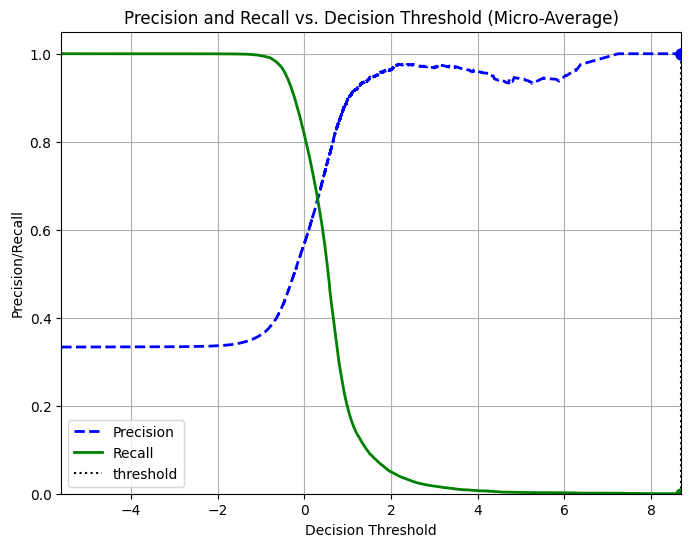

In [51]:
import matplotlib.pyplot as plt

# Plot Precision and Recall vs. Threshold for Micro-Average
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision["micro"][:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recall["micro"][:-1], "g-", label="Recall", linewidth=2)
# Find closest threshold to desired threshold
close_default_clf_threshold = np.argmin(np.abs(thresholds - threshold))
plt.vlines(thresholds[close_default_clf_threshold], 0, 1.0, "k", "dotted", label="threshold")


# Add grid, legend, axis labels, and circles
plt.grid(True)
plt.legend(loc="lower left")
plt.xlabel("Decision Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision and Recall vs. Decision Threshold (Micro-Average)")
plt.xlim([thresholds.min(), thresholds.max()])
plt.ylim([0, 1.05])

# Add circles for the threshold point
plt.plot(thresholds[close_default_clf_threshold], precision["micro"][close_default_clf_threshold], "bo", markersize=8)
plt.plot(thresholds[close_default_clf_threshold], recall["micro"][close_default_clf_threshold], "go", markersize=8)

plt.show()

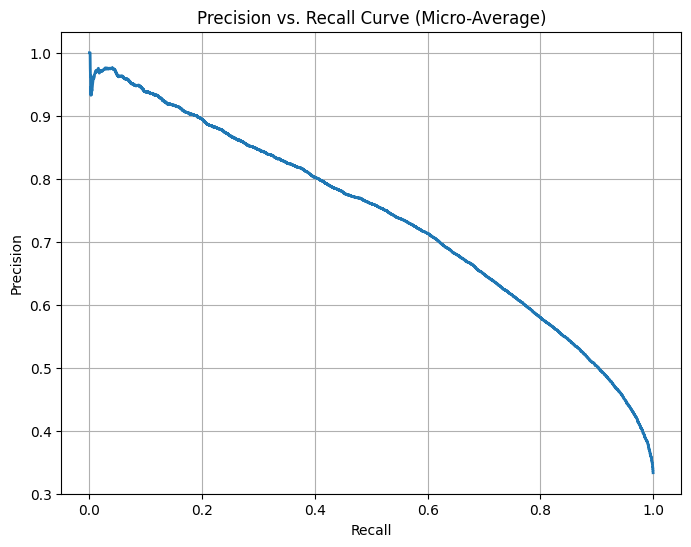

In [52]:
# Another way to select a good precision/recall trade-off is  to plot directly precision against recall
import matplotlib.pyplot as plt

# Assuming you have already calculated precision and recall using precision_recall_curve
# ... (previous code to calculate precision and recall) ...

# Plot Precision vs. Recall
plt.figure(figsize=(8, 6))
plt.plot(recall["micro"], precision["micro"], linewidth=2)

# Add axis labels and title
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs. Recall Curve (Micro-Average)")

# Add grid and legend (optional)
plt.grid(True)

plt.show()

In [53]:
idx_for_20_precision = (precision['micro']>=0.6).argmax()
threshold_for_20_precision = thresholds[idx_for_20_precision]
threshold_for_20_precision

0.10513656103807861

Training....
train time: 15.7s
predict time: 0.0146s
[0.67412664 0.67816594 0.67259825]
[[4006 3421  354]
 [1020 9007 1090]
 [ 234 2813 5535]]
Precision (macro): 0.7152207485347041
Recall (macro): 0.6566663333792401
F1-score (macro): 0.6697332339868378


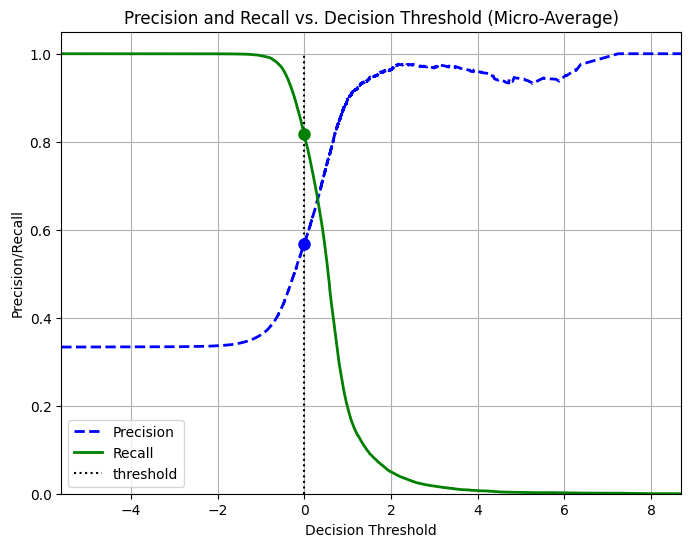

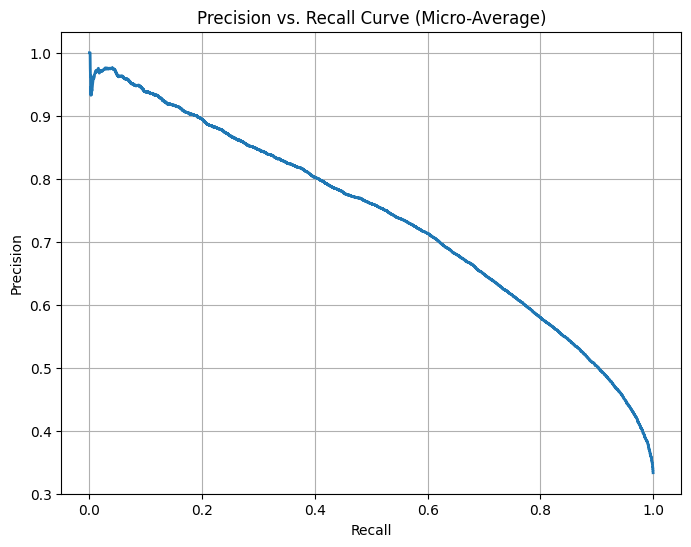

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import time
import matplotlib.pyplot as plt
import numpy as np


# Assuming XV_train, y_train, XV_test are already defined

# Define the pipeline steps
steps = [('clf', LogisticRegression(max_iter=300))]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline
print("Training....")
t0 = time.time()
pipeline.fit(XV_train, y_train)
train_time = time.time() - t0
print(f"train time: {train_time:.3}s")

# Predict on test set
t0 = time.time()
y_pred = pipeline.predict(XV_test)
predict_time = time.time() - t0
print(f"predict time: {predict_time:.3}s")

# Cross-validation and evaluation
cv_scores = cross_val_score(pipeline, XV_train, y_train, cv=3, scoring='accuracy')
print(cv_scores)

y_train_predict = cross_val_predict(pipeline, XV_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_predict)
print(cm)

precision_macro = precision_score(y_train, y_train_predict, average='macro')
recall_macro = recall_score(y_train, y_train_predict, average='macro')
f1_macro = f1_score(y_train, y_train_predict, average='macro')
print(f"Precision (macro): {precision_macro}")
print(f"Recall (macro): {recall_macro}")
print(f"F1-score (macro): {f1_macro}")

# Get decision scores for precision-recall curve
y_scores = cross_val_predict(pipeline, XV_train, y_train, cv=3, method='decision_function')

# Binarize the labels for multi-class precision-recall curve
y_train_bin = label_binarize(y_train, classes=['negative', 'neutral', 'positive'])
n_classes = y_train_bin.shape[1]

# Calculate precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], thresholds = precision_recall_curve(y_train_bin[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_train_bin[:, i], y_scores[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], thresholds = precision_recall_curve(
    y_train_bin.ravel(), y_scores.ravel()
)
average_precision["micro"] = average_precision_score(
    y_train_bin, y_scores, average="micro"
)

threshold = 0  # You might need to adjust this threshold

# Plot Precision and Recall vs. Threshold for Micro-Average
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision["micro"][:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recall["micro"][:-1], "g-", label="Recall", linewidth=2)
# Find closest threshold to desired threshold
close_default_clf_threshold = np.argmin(np.abs(thresholds - threshold))
plt.vlines(thresholds[close_default_clf_threshold], 0, 1.0, "k", "dotted", label="threshold")

# Add grid, legend, axis labels, and circles
plt.grid(True)
plt.legend(loc="lower left")
plt.xlabel("Decision Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision and Recall vs. Decision Threshold (Micro-Average)")
plt.xlim([thresholds.min(), thresholds.max()])
plt.ylim([0, 1.05])

# Add circles for the threshold point
plt.plot(thresholds[close_default_clf_threshold], precision["micro"][close_default_clf_threshold], "bo", markersize=8)
plt.plot(thresholds[close_default_clf_threshold], recall["micro"][close_default_clf_threshold], "go", markersize=8)

plt.show()

# Plot Precision vs. Recall
plt.figure(figsize=(8, 6))
plt.plot(recall["micro"], precision["micro"], linewidth=2)

# Add axis labels and title
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs. Recall Curve (Micro-Average)")

# Add grid and legend (optional)
plt.grid(True)

plt.show()

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
import time
import matplotlib.pyplot as plt
import numpy as np

def evaluate_classifier(clf, XV_train, y_train, XV_test, y_test):
    """
    Evaluates a given classifier using a pipeline, cross-validation, and precision-recall analysis.

    Args:
        clf: The classifier object (e.g., LogisticRegression, RandomForestClassifier).
        XV_train: The training data (features).
        y_train: The training labels.
        XV_test: The testing data (features).
        y_test: The testing labels.
    """

    # Define the pipeline steps
    steps = [('clf', clf)]

    # Create the pipeline
    pipeline = Pipeline(steps)

    # Fit the pipeline
    print("Training....")
    t0 = time.time()
    pipeline.fit(XV_train, y_train)
    train_time = time.time() - t0
    print(f"train time: {train_time:.3}s")

    # Predict on test set
    t0 = time.time()
    y_pred = pipeline.predict(XV_test)
    predict_time = time.time() - t0
    print(f"predict time: {predict_time:.3}s")

    # Cross-validation and evaluation
    cv_scores = cross_val_score(pipeline, XV_train, y_train, cv=2, scoring='accuracy')
    print("Cross-validation scores:", cv_scores)

    y_train_predict = cross_val_predict(pipeline, XV_train, y_train, cv=3)
    cm = confusion_matrix(y_train, y_train_predict)
    print("Confusion Matrix:\n", cm)

    precision_macro = precision_score(y_train, y_train_predict, average='macro')
    recall_macro = recall_score(y_train, y_train_predict, average='macro')
    f1_macro = f1_score(y_train, y_train_predict, average='macro')
    print(f"Precision (macro): {precision_macro}")
    print(f"Recall (macro): {recall_macro}")
    print(f"F1-score (macro): {f1_macro}")

    # ... (rest of the code for precision-recall curve and analysis)
    # Get decision scores for precision-recall curve
    y_scores = cross_val_predict(pipeline, XV_train, y_train, cv=2, method='decision_function')

    # Binarize the labels for multi-class precision-recall curve
    y_train_bin = label_binarize(y_train, classes=['negative', 'neutral', 'positive'])
    n_classes = y_train_bin.shape[1]

    # Calculate precision and recall for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], thresholds = precision_recall_curve(y_train_bin[:, i], y_scores[:, i])
        average_precision[i] = average_precision_score(y_train_bin[:, i], y_scores[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], thresholds = precision_recall_curve(
        y_train_bin.ravel(), y_scores.ravel()
    )
    average_precision["micro"] = average_precision_score(
        y_train_bin, y_scores, average="micro"
    )

    threshold = 0  # You might need to adjust this threshold

    # Plot Precision and Recall vs. Threshold for Micro-Average
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, precision["micro"][:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recall["micro"][:-1], "g-", label="Recall", linewidth=2)
    # Find closest threshold to desired threshold
    close_default_clf_threshold = np.argmin(np.abs(thresholds - threshold))
    plt.vlines(thresholds[close_default_clf_threshold], 0, 1.0, "k", "dotted", label="threshold")
    # Add grid, legend, axis labels, and circles
    plt.grid(True)
    plt.legend(loc="lower left")
    plt.xlabel("Decision Threshold")
    plt.ylabel("Precision/Recall")
    plt.title("Precision and Recall vs. Decision Threshold (Micro-Average)")
    plt.xlim([thresholds.min(), thresholds.max()])
    plt.ylim([0, 1.05])

    # Add circles for the threshold point
    plt.plot(thresholds[close_default_clf_threshold], precision["micro"][close_default_clf_threshold], "bo", markersize=8)
    plt.plot(thresholds[close_default_clf_threshold], recall["micro"][close_default_clf_threshold], "go", markersize=8)

    plt.show()

    # Plot Precision vs. Recall
    plt.figure(figsize=(8, 6))
    plt.plot(recall["micro"], precision["micro"], linewidth=2)

    # Add axis labels and title
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision vs. Recall Curve (Micro-Average)")

    # Add grid and legend (optional)
    plt.grid(True)

    plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#clf_lr = LogisticRegression(max_iter=300)
clf_rf = RandomForestClassifier()

#evaluate_classifier(clf_lr, XV_train, y_train, XV_test, y_test)
evaluate_classifier(clf_rf, XV_train, y_train, XV_test, y_test)

Training....
train time: 6.29e+02s
predict time: 1.07s
Cross-validation scores: [0.67765648 0.67445415]
Confusion Matrix:
 [[4122 3192  467]
 [ 977 8814 1326]
 [ 243 2363 5976]]
Precision (macro): 0.7180786459572298
Recall (macro): 0.6729776446744431
F1-score (macro): 0.6836161133726498


AttributeError: This 'Pipeline' has no attribute 'decision_function'